Data Dictionary

In [35]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
from google.colab import files
uploaded = files.upload()


Saving Community_Crime_Statistics_20240524.csv to Community_Crime_Statistics_20240524 (1).csv


In [37]:
df = pd.read_csv('/content/Community_Crime_Statistics_20240524.csv')
df.head()

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


In [38]:
df.tail()

,Community,Category,Crime Count,Year,Month
70656,SCARBORO/ SUNALTA WEST,Violence 'Other' (Non-domestic),1,2018,8
70657,SCARBORO/ SUNALTA WEST,Violence 'Other' (Non-domestic),1,2019,1
70658,SCARBORO/ SUNALTA WEST,Violence 'Other' (Non-domestic),1,2019,3
70659,SCARBORO/ SUNALTA WEST,Violence 'Other' (Non-domestic),1,2019,11
70660,01H,Theft OF Vehicle,1,2021,10


**Data Preprocessing**

In [39]:
#shape of the dataset
df.shape

(70661, 5)

Here we have bearly 70661 records and 5 columns. Therefore, we have enough data for
preparing an analysis and developing a model for prediction

In [40]:
#checking for missing values
df.isnull().sum()

Community      0
Category       0
Crime Count    0
Year           0
Month          0
dtype: int64

The dataset is pretty clean and does not have any missing values.

In [41]:
#checking for the datatypes
df.dtypes

Community      object
Category       object
Crime Count     int64
Year            int64
Month           int64
dtype: object

Making sure that the columns have correct datatype, before I proceed with the analysis.

In [42]:
#describing the data
df.describe()

,Crime Count,Year,Month
count,70661.000000,70661.000000,70661.000000
mean,2.855748,2020.618616,6.369242
std,3.664965,1.825330,3.451445
min,1.000000,2018.000000,1.000000
25%,1.000000,2019.000000,3.000000
50%,2.000000,2021.000000,6.000000
75%,3.000000,2022.000000,9.000000
max,111.000000,2024.000000,12.000000


**Exploratory Data Analysis**


In the exploraotry data analysis, I will be analyzing the data to understand the trends and
patterns in the data. Through this analysis, I will be able to understand the data better
and build a better model for prediction.

**Community Distribution**

Text(0, 0.5, '')

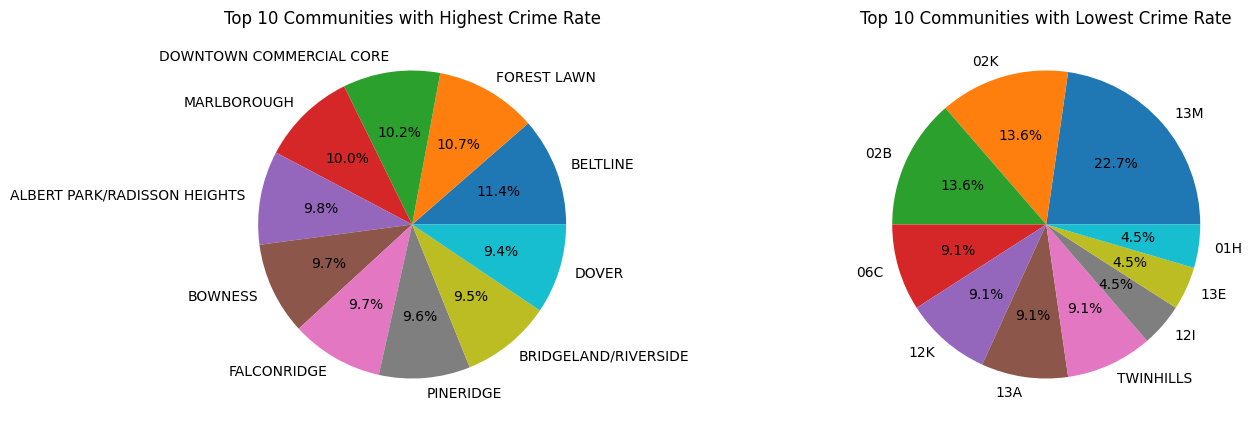

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
#Top 10 Communities with Highest Crime Rate
df['Community'].value_counts().head(10).plot.pie(autopct='%1.1f%%', ax = ax[0])
ax[0].set_title('Top 10 Communities with Highest Crime Rate')
ax[0].set_ylabel('')
#Top 10 Communities with Lowest Crime Rate
df['Community'].value_counts().tail(10).plot.pie(autopct='%1.1f%%', ax = ax[1])
ax[1].set_title('Top 10 Communities with Lowest Crime Rate')
ax[1].set_ylabel('')

These pie charts show the distribution of crimes in each community. The first pie chart
shows the top 10 most dangerous communities in Calgary. The second pie chart shows
the distribution of top 10 safest communities in Calgary. In the first pie chart, Beltline is
the most dangerous community in Calgary with 11.4% of the top crimes in number,
followed by Forest Lawn with 10.7% and Downtown Commercial Core with 10.2%. In the
second pie chart, the safest community is 13M with 22.7% of the least crimes in number,
followed by 02K with 13.6% and 02B with 13.6%.


 *This is note that all these observations are without any bias and completely based on the
data from the city of Calgary website.*

**Crime Category Distribution**

Text(0, 0.5, '')

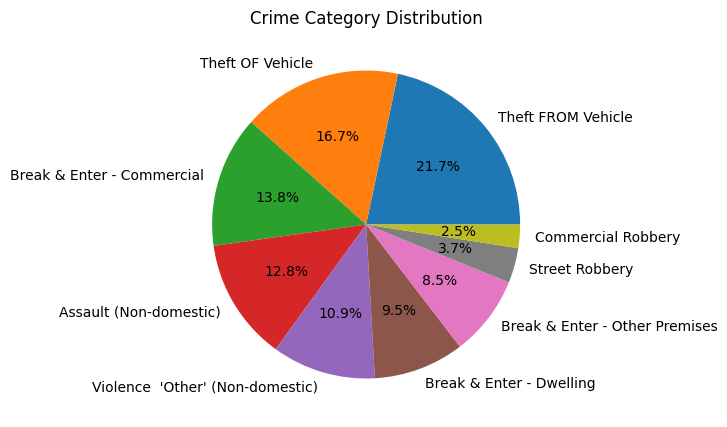

In [44]:
plt.figure(figsize=(5, 5))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Crime Category Distribution')
plt.ylabel('')

This graph shows the distribution of crimes in each category by the number of crimes.
The top crime category is Theft from Vehicle with 21.7% of the total crimes, followed by
Theft of Vehicle with 16.7% and Break and Enter - Commercial with 13.8%. The least
crime category inc;udes commerical or street robbery.

**Crime Reportings Over the Years**

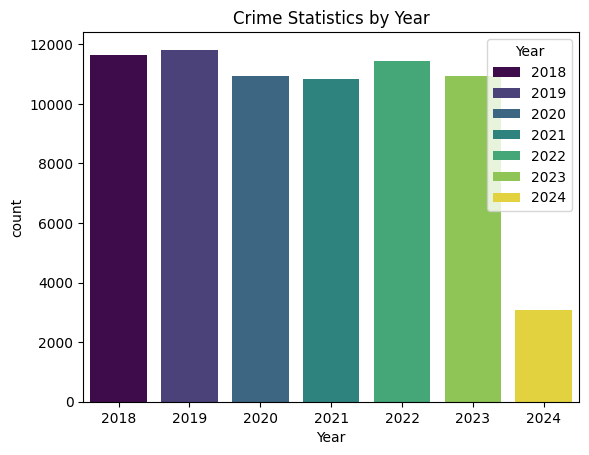

In [45]:
sns.countplot(x='Year', data=df, hue='Year', palette='viridis').set_title('Crime Statistics by Year')
plt.show()

This bar graph shows the distribution of number of crimes reported in the year. The year
2019 had the highest reportings of crimes followed by 2022 and 2018. The crime
reportings in 2024 are less due to limited data till April 2024.

**Crime Reportings by Month**

Text(0.5, 1.0, 'Crime reporting by month')

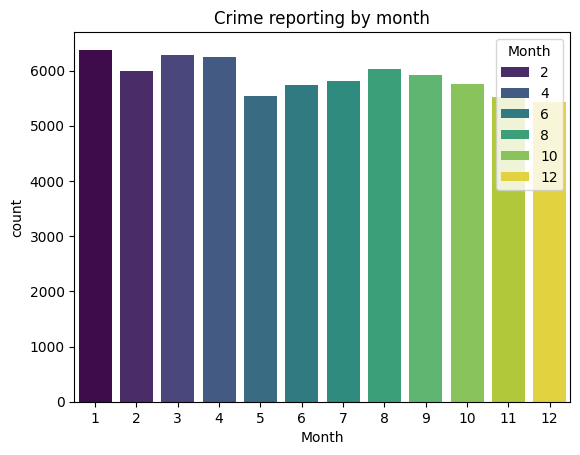

In [46]:
sns.countplot(x = 'Month', data = df, hue = 'Month', palette='viridis').set_title('Crime reporting by month')

**Community and Category Analysis**

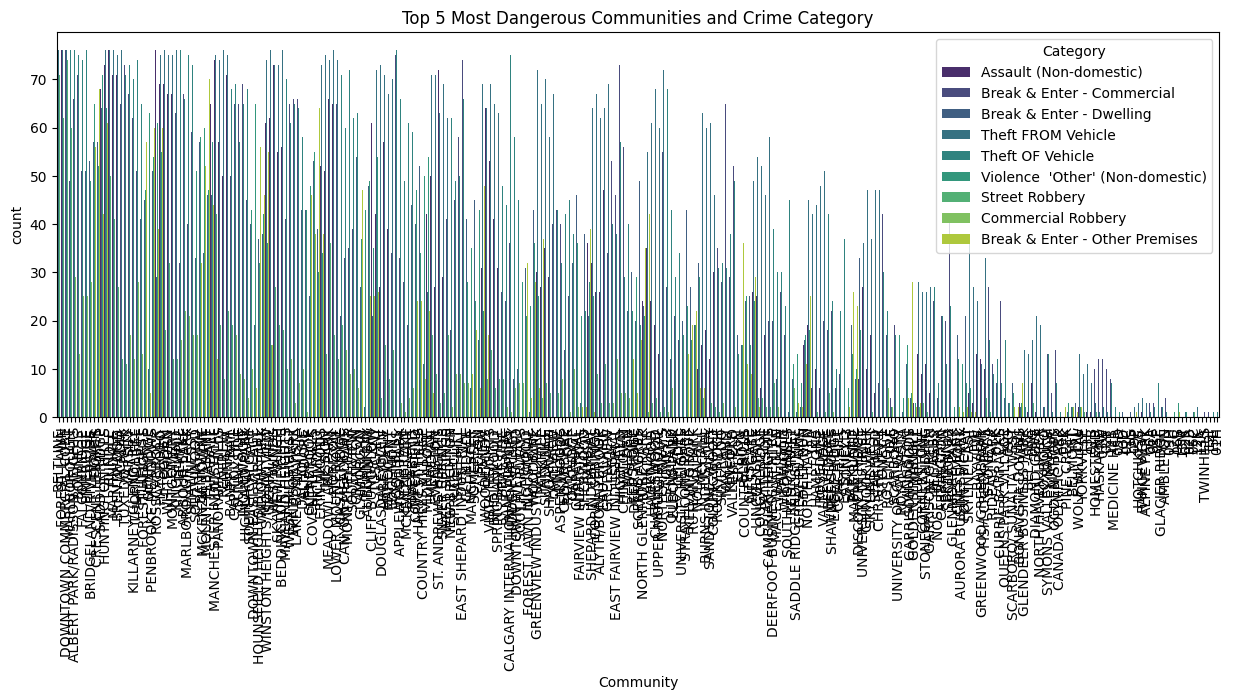

In [47]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Community', data=df, hue='Category', palette='viridis', order=df['Community'].value_counts().index)
plt.title('Top 5 Most Dangerous Communities and Crime Category')
plt.xticks(rotation=90)
sns.move_legend(plt.gca(), "upper right")
plt.show()

These two graphs shows the analysis of communities with the crime category. This help
us to visualize the pattern of crime in each community. We can see that certain
cateogries are more common in certain communities than others. In the top 5 dangerous
communities, Forest Lawn has the highest of Break & Enter - other premises, Malbrough
has the lowest Commerical Robbery. These are the few examples of the analysis

**Year and Category Analysis**

Text(0.5, 1.0, 'Crime Reportings by Year and Crime Category')

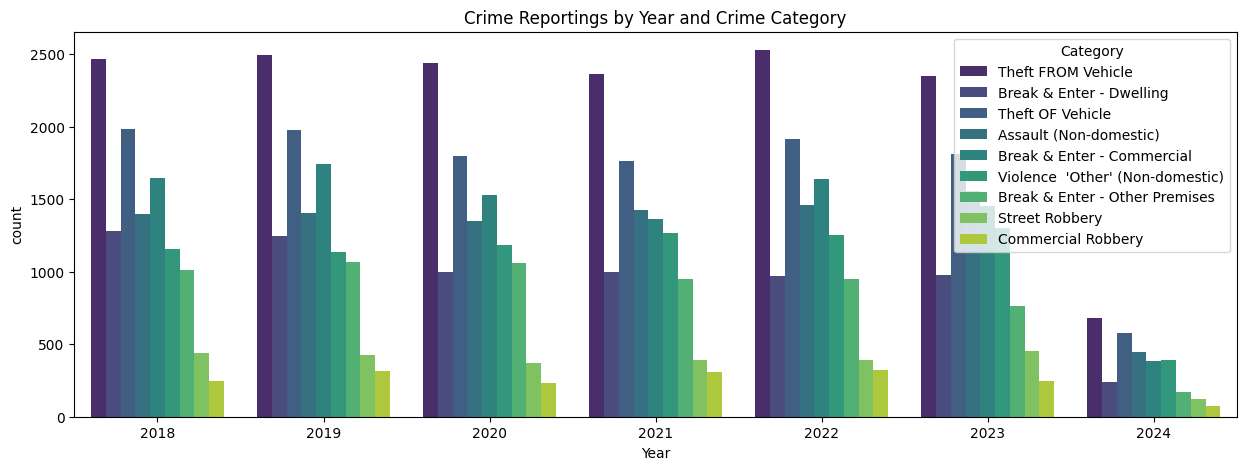

In [48]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Year', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Year and Crime Category')

**Month and Category Analysis**

Text(0.5, 1.0, 'Crime Reportings by Month and Crime Category')

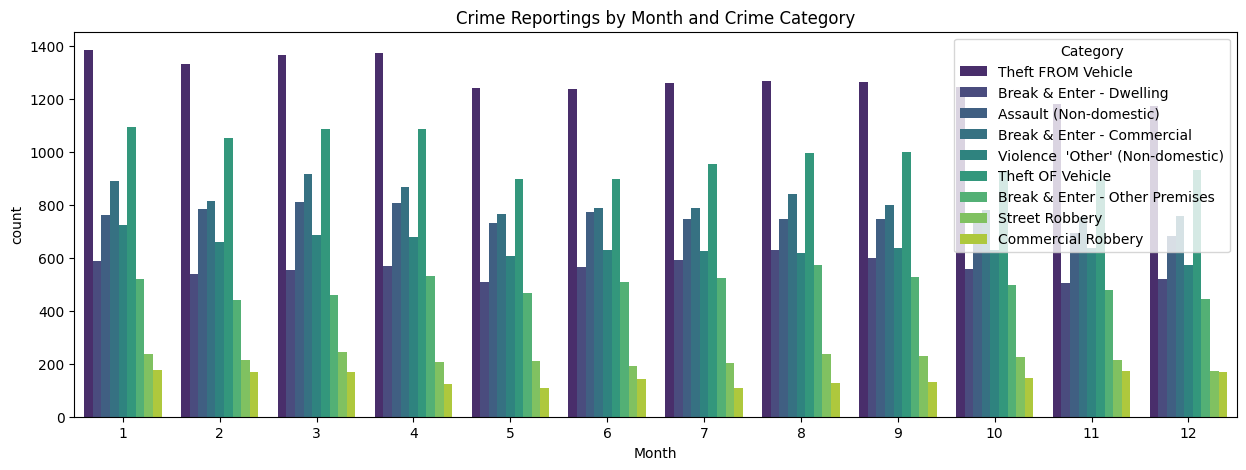

In [49]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Month', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Month and Crime Category')

From the above, graphs, charts, and visualization I have studied the patterns, trends and
relationships in the data. This will help me to build a better model for prediction.



**Data Preprocessing Part 2**

In [50]:
from sklearn.preprocessing import LabelEncoder
#Label Encoding Object
le = LabelEncoder()
#Object type columns
object_type_columns = df.select_dtypes(include='object').columns
#Label Encoding
for col in object_type_columns:
 df[col] = le.fit_transform(df[col])
df.head()

,Community,Category,Crime Count,Year,Month
0,0,0,1,2022,11
1,0,1,1,2019,6
2,0,1,1,2019,8
3,0,1,2,2020,3
4,0,1,2,2020,7


**Building a Neural Network Model**

In [51]:
# Prepare sequences for LSTM
def create_sequences(data, seq_length):
 xs = []
 ys = []
 for i in range(len(data) - seq_length):
  x = data.iloc[i:(i + seq_length)].to_numpy()
  y = data.iloc[i + seq_length]['Crime Count']
  xs.append(x)
  ys.append(y)
 return np.array(xs), np.array(ys)

In [52]:
seq_length = 3
X, y = create_sequences(df, seq_length)

**Train Test Split**

In [53]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and temporary sets (70% training, 30% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets (15% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


**Building and Training the LSTM Model**

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [55]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


Epoch 1/100
1546/1546 [==============================] - 9s 5ms/step - loss: 764.0525 - val_loss: 10.9579
Epoch 2/100
1546/1546 [==============================] - 6s 4ms/step - loss: 12.3547 - val_loss: 9.2604
Epoch 3/100
1546/1546 [==============================] - 8s 5ms/step - loss: 10.1108 - val_loss: 7.7126
Epoch 4/100
1546/1546 [==============================] - 6s 4ms/step - loss: 7.6738 - val_loss: 6.2204
Epoch 5/100
1546/1546 [==============================] - 8s 5ms/step - loss: 6.5437 - val_loss: 5.4582
Epoch 6/100
1546/1546 [==============================] - 6s 4ms/step - loss: 6.4304 - val_loss: 4.9851
Epoch 7/100
1546/1546 [==============================] - 8s 5ms/step - loss: 5.8836 - val_loss: 5.2189
Epoch 8/100
1546/1546 [==============================] - 7s 5ms/step - loss: 5.6928 - val_loss: 5.0456
Epoch 10/100
1546/1546 [==============================] - 6s 4ms/step - loss: 5.6835 - val_loss: 5.1393
Epoch 11/100
1546/1546 [==============================] - 7s 5ms/st

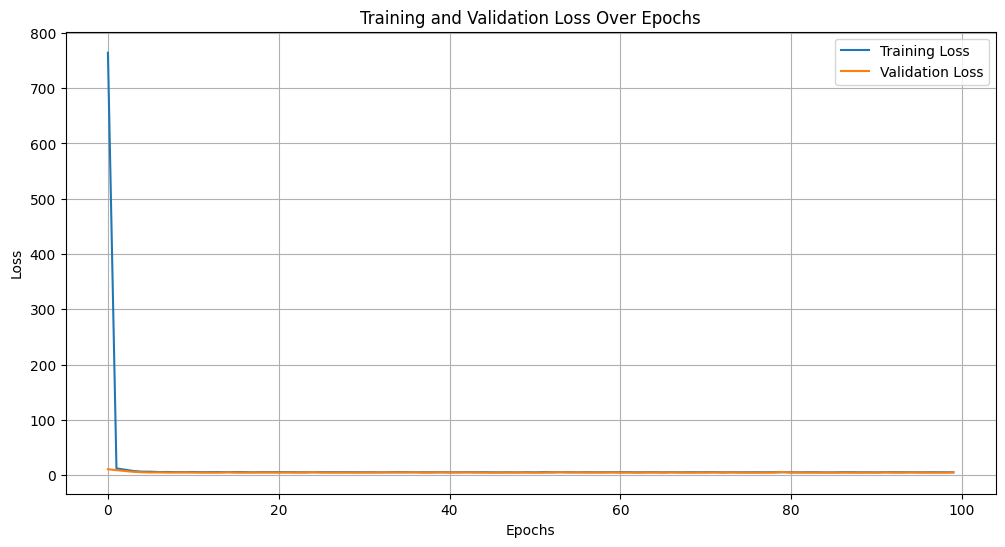

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
# Predictions
y_pred = model.predict(X_test)
print(f'Predictions: {y_pred.flatten()}')
print(f'True Values: {y_test.flatten()}')

332/332 [==============================] - 1s 4ms/step - loss: 5.1366
Test Loss: 5.136634349822998
332/332 [==============================] - 2s 4ms/step
Predictions: [2.6913044 1.8409897 1.8409897 ... 2.896269  1.8409897 2.1454394]
True Values: [2 1 1 ... 1 2 2]


**Model Evaluation**



**Actual vs Predicted Values**

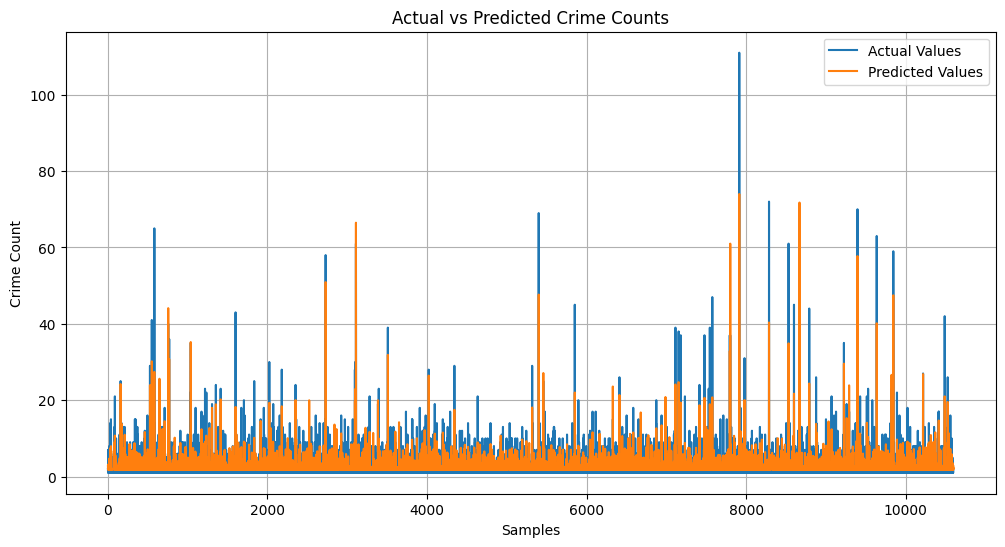

In [58]:
# Plotting Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Crime Counts')
plt.xlabel('Samples')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()

**Residual Plot**

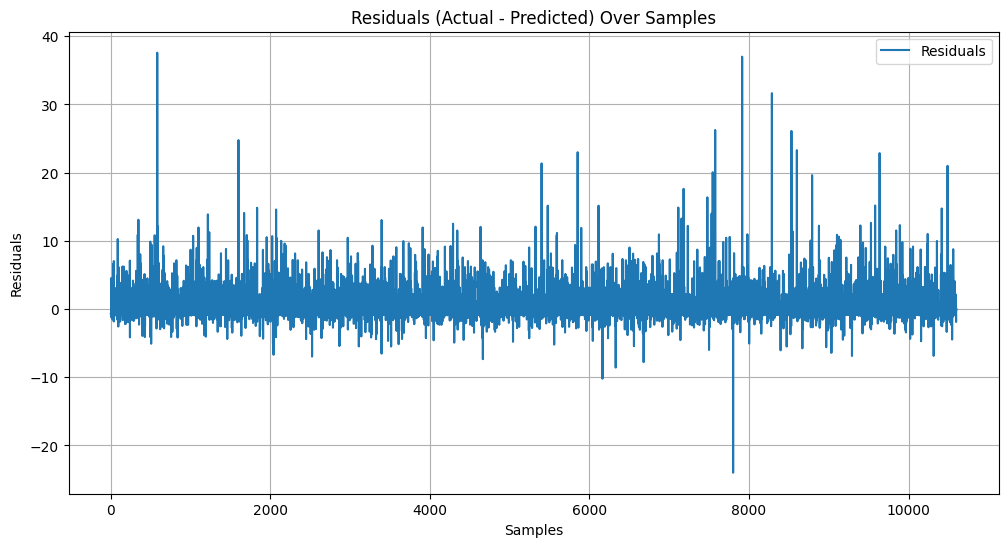

In [59]:
# Calculating residuals
residuals = y_test.flatten() - y_pred.flatten()
# Plotting residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals (Actual - Predicted) Over Samples')
plt.xlabel('Samples')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()